In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.io import loadmat
from tueplots import bundles, figsizes
from tueplots.constants.color import rgb


plt.rcParams.update({"figure.dpi": 150})

# Load Data

In [2]:
data_dir = '..\data\data_for_Meike.mat'
matDf = loadmat(data_dir)['data']
df = pd.DataFrame(np.squeeze(np.array(matDf.tolist())).T, columns=matDf.dtype.names).drop(columns=['label','Spcorrect1', 'Spcorrect2', 'Snoise']).sort_values(by=['subject', 'trial'])

df['Sconfidence'] = df.groupby(['subject', 'block'])['Sreport'].transform(lambda x: np.where(x >= np.mean(x), 1, 0))
df['theta'] = np.absolute(df['dtheta'])


df ['theta_rescaled'] = 0

for subject in df['subject'].unique():
    df.loc[df['subject'] == subject, 'theta_rescaled'] = pd.qcut(
        df.loc[df['subject'] == subject, 'theta'], 
                4, 
                labels=[1, 2, 3, 4]
            ).astype(int)
    

# split by partner type
df_1 = df[df['type'] == 1]
df_2 = df[df['type'] == 2]

# one df for each block
for i in range(1,5):
        exec(f'df_1_{i} = df_1[df_1["block"] == {i}]')
        exec(f'df_2_{i} = df_2[df_2["block"] == {i}]')

Text(0.5, 1.0, 'Block 4')

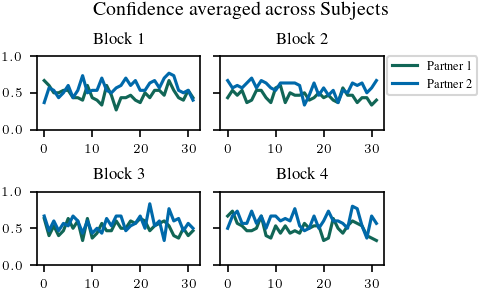

In [3]:
# Plot the data
plt.rcParams.update(
    bundles.icml2022(
        column="full",
        nrows=2,
        ncols=2,
        usetex=True,
    )
)
plt.rcParams.update(figsizes.icml2022_half(nrows=2, ncols=2))

fig, axs = plt.subplots(2,2, sharey = True)
fig.suptitle('Confidence averaged across Subjects')

### BLOCK 1 ###
xs_1_1 = np.zeros((32, 30))
xs_2_1 = np.zeros((32, 30))
for s, subject in enumerate(np.sort(df['subject'].unique())):
    xs_1_1[:,s] = df_1_1[df_1_1['subject'] == subject]['Sconfidence'].values
    xs_2_1[:,s] = df_2_1[df_2_1['subject'] == subject]['Sconfidence'].values
axs[0,0].plot(xs_1_1.mean(axis=1), color=rgb.mps_green, label='Partner 1')
axs[0,0].plot(xs_2_1.mean(axis=1), color=rgb.tue_blue, label='Partner 2')
axs[0,0].set_title('Block 1')
axs[0,0].set_ylim([0,1])

### BLOCK 2 ###
xs_1_2 = np.zeros((32, 30))
xs_2_2 = np.zeros((32, 30))
for s, subject in enumerate(np.sort(df['subject'].unique())):
    xs_1_2[:,s] = df_1_2[df_1_2['subject'] == subject]['Sconfidence'].values
    xs_2_2[:,s] = df_2_2[df_2_2['subject'] == subject]['Sconfidence'].values
axs[0,1].plot(xs_1_2.mean(axis=1), color=rgb.mps_green, label='Partner 1')
axs[0,1].plot(xs_2_2.mean(axis=1), color=rgb.tue_blue, label='Partner 2')
axs[0,1].set_title('Block 2')
axs[0,1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### BLOCK 3 ###
xs_1_3 = np.zeros((32, 30))
xs_2_3 = np.zeros((32, 30))
for s, subject in enumerate(np.sort(df['subject'].unique())):
    xs_1_3[:,s] = df_1_3[df_1_3['subject'] == subject]['Sconfidence'].values
    xs_2_3[:,s] = df_2_3[df_2_3['subject'] == subject]['Sconfidence'].values
axs[1,0].plot(xs_1_3.mean(axis=1), color=rgb.mps_green, label='Partner 1')
axs[1,0].plot(xs_2_3.mean(axis=1), color=rgb.tue_blue, label='Partner 2')
axs[1,0].set_title('Block 3')

### BLOCK 4 ###
xs_1_4 = np.zeros((32, 30))
xs_2_4 = np.zeros((32, 30))
for s, subject in enumerate(np.sort(df['subject'].unique())):
    xs_1_4[:,s] = df_1_4[df_1_4['subject'] == subject]['Sconfidence'].values
    xs_2_4[:,s] = df_2_4[df_2_4['subject'] == subject]['Sconfidence'].values
axs[1,1].plot(xs_1_4.mean(axis=1), color=rgb.mps_green, label='type 1')
axs[1,1].plot(xs_2_4.mean(axis=1), color=rgb.tue_blue, label='type 2')
axs[1,1].set_title('Block 4')





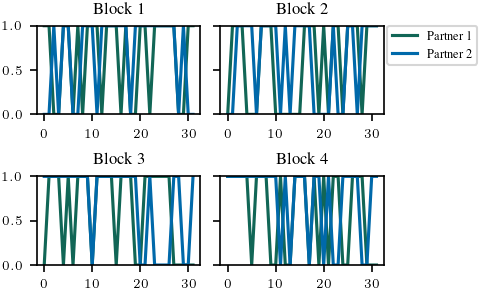

In [13]:
# plot choice distribution of single subject
fig, ax = plt.subplots(2,2, sharey= True)
subject = 7
ax[0,0].plot(xs_1_1[:,subject], color=rgb.mps_green, label='Partner 1')
ax[0,0].plot(xs_2_1[:,subject], color=rgb.tue_blue, label='Partner 2')
ax[0,0].set_title('Block 1')
ax[0,0].set_ylim([0,1])


ax[0,1].plot(xs_1_2[:,subject], color=rgb.mps_green, label='Partner 1')
ax[0,1].plot(xs_2_2[:,subject], color=rgb.tue_blue, label='Partner 2')
ax[0,1].set_title('Block 2')
ax[0,1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax[1,0].plot(xs_1_3[:,subject], color=rgb.mps_green, label='Partner 1')
ax[1,0].plot(xs_2_3[:,subject], color=rgb.tue_blue, label='Partner 2')
ax[1,0].set_title('Block 3')

ax[1,1].plot(xs_1_4[:,subject], color=rgb.mps_green, label='Partner 1')
ax[1,1].plot(xs_2_4[:,subject], color=rgb.tue_blue, label='Partner 2')
ax[1,1].set_title('Block 4')

plt.show()




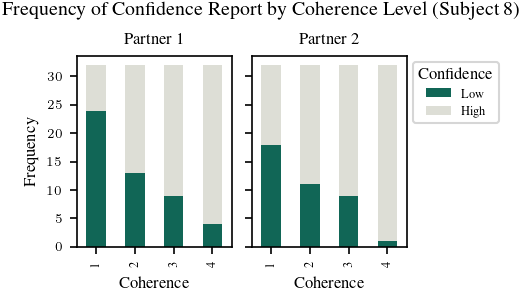

In [16]:
# Filter for a specific subject
subject = 8
subject_df = df[df['subject'] == subject]
subject_df_1 = df_1[df_1['subject'] == subject]
subject_df_2 = df_2[df_2['subject'] == subject]

# Calculate frequencies of each combination of theta_rescaled and Sreport
counts_1 = subject_df_1.groupby(['theta_rescaled', 'Sconfidence']).size().unstack(fill_value=0)
counts_2 = subject_df_2.groupby(['theta_rescaled', 'Sconfidence']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(1,2, sharey=True)
counts_1.plot(kind='bar', stacked=True, ax=ax[0], color=[rgb.mps_green, rgb.mps_gray])
counts_2.plot(kind='bar', stacked=True, ax=ax[1], color=[rgb.mps_green, rgb.mps_gray])

# Customizing plot
ax[0].set_xlabel('Coherence')
ax[1].set_xlabel('Coherence')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Partner 1')
ax[1].set_title('Partner 2')
ax[1].legend(title='Confidence', bbox_to_anchor=(1, 1), loc='upper left', labels=['Low', 'High'])
ax[0].get_legend().remove()
plt.suptitle(f'Frequency of Confidence Report by Coherence Level (Subject {subject})')

plt.show()

COHERENCE HEATMAP

Text(0.5, 1.0, 'Mean Confidence across all Subjects')

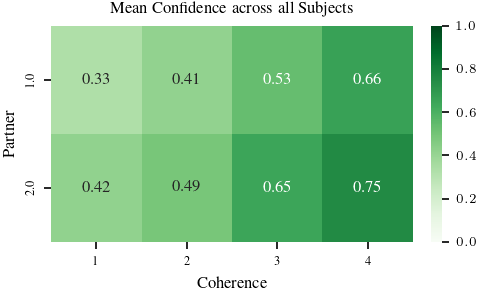

In [24]:
### ALL SUBJECTS ###

plt.rcParams.update(figsizes.icml2022_half(nrows=1, ncols=1))### ALL SUBJECTS ###

ax = sns.heatmap(pd.pivot_table(df, index='type', columns='theta_rescaled', values='Sconfidence', aggfunc=np.mean), cmap='Greens', annot=True, fmt=".2f", vmin=0, vmax=1)
# change labels 
plt.xlabel('Coherence')
plt.ylabel('Partner')
plt.title('Mean Confidence across all Subjects')

Text(0.5, 1.0, 'Mean Confidence of Single Subject')

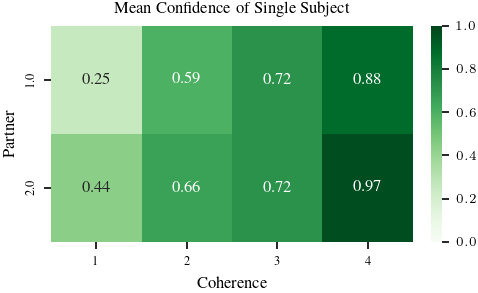

In [25]:
### SINGLE SUBJECT ###
ax = sns.heatmap(pd.pivot_table(subject_df, index='type', columns='theta_rescaled', values='Sconfidence', aggfunc=np.mean), cmap='Greens', annot=True, fmt=".2f", vmin=0, vmax=1)
# change labels 
plt.xlabel('Coherence')
plt.ylabel('Partner')
plt.title('Mean Confidence of Single Subject')